# 概率分布
概率分布用来描述随机变量（含随机向量）在每一个可能状态的可能性大小。概率分布有不同方式，这取决于随机变量是离散的还是连续的。
对于随机变量X，其概率分布通常记为P（X=x），或X~P（x），表示X服从概率分布P（x）。概率分布描述了取单点值的可能性或概率，但在实际应用中，我们并不关心取某一值的概率，特别是对连续性随机变量，他在某点的概率都是0。因此，我们通常比较关心随机变量落在某一区间的概率，为此，引入分布函数的概念。
定义：设X是一个随机变量，x<sub>k</sub> 是任意实数值，函数：称为随机变量X的分布函数。
若随机变量X的分布函数已知，对任意的实数x1、x2（x1＜x2），那么可以求出X落在任意一区间[x1, x2]的概率。

## 离散型随机变量
设x1, x2, …, xn是随机变量X的所有可能取值，对每个取值xi, X=xi是其样本空间S上的一个事件，为描述随机变量X，还需知道这些事件发生的可能性（概率）。
设离散型随机变量X的所有可能取值为xi（i=1, 2, …, n)：
P(X=x<sub>i</sub>)=P<sub>i</sub>, i=1, 2, ... n
称为X的概率分布或分布律，也称概率函数。

### 1.两点分布
若随机变量X只可能取0和1两个值，且它的分布列为P(X=1)=p, P(X=0)=l- P，其中(0 < P < 1)，则称X服从参数为p的两点分布，记作X~B(1, p)。其分布函数为：
![](https://i.imgur.com/sqdVNJf.png#pic_center =30x30)

### 2.二项分布
二项分布是重要的离散概率分布之一，由瑞士数学家雅各布·伯努利提出。一般用二项分布来计算概率的前提是，每次抽出样品后再放回，并且只能有两种试验结果，比如红球或黑球。二项分布指出，假设某样品在随机一次实验出现的概率为P，那么在n次实验中出现k次的概率为：

![](https://i.imgur.com/PuTq7Ik.png#pic_center =30x30)

假设随机变量X满足二项分布，且知道n、p、k等参数，我们可以使用scipy库的stats接口求出各种情况的概率值：

[0.2 0.4 0.6 0.8]


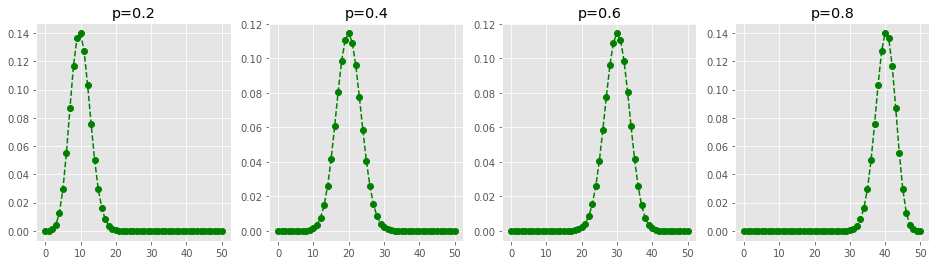

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
n = 50
p_list = np.arange(0,1,0.2)[1:]
print(p_list)
k = np.arange(0,51)
#定义二项分布
plt.figure(figsize=(16,4))
for i, p in enumerate(p_list):
    plt.subplot(1, len(p_list), i+1)
    binomial = stats.binom.pmf(k, n, p)
    #二项分布可视化
    plt.plot(k, binomial, '--o', c='g')
    plt.title('p={}'.format(round(p, 1)))
plt.savefig('x.png')
plt.show()

### 3.泊松分布
若随机变量X所有可能取值为0,1,2, …，它取各个值的概率为：
![](https://i.imgur.com/SRpCTqK.png)


## 连续型随机变量

与离散型随机变量不同，连续型随机变量采用概率密度函数来描述变量的概率分布。
连续型随机变量在任意一点的概率处处为0。概率大小都是范围的面积衡量。
即：P(x1≤X≤x2)=P(x1＜X≤x2)=P(x1≤X＜x2)=P(x1＜X＜x2)成立。
最常见的正态分布的密度函数为：

![](https://i.imgur.com/ulbaPWi.png)

这个连续分布被称为正态分布，或者高斯分布。其密度函数的曲线呈对称钟型，因此又称为钟形曲线，其中μ是平均值，σ是标准差。正态分布是一种理想分布。下面是使用scipy来实现的正态分布：

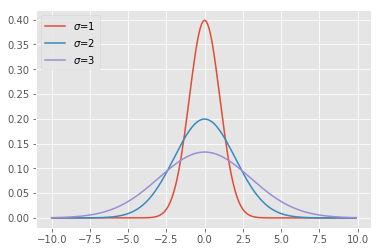

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
#平均值或期望值
mu=0
#标准差
sigmas=np.arange(1, 4, 1)
#随机变量的取值
x=np.arange(-10,10,0.1)
for sigma in sigmas:
    y=stats.norm.pdf(x,0,sigma) #定义正态分布的密度函数
    plt.plot(x, y, label='$\sigma$={}'.format(sigma))

plt.legend(loc='upper left')
plt.savefig('xx.png')
plt.show()

正态分布的取值范围是负无穷到正无穷。这里我们为便于可视化，只把X数据定义在[-10, 10]之间，用stats.norm.pdf得到正态分布的概率密度函数。另外从图形可以看出，上面两图的均值u都是0，只是标准差（σ）不同，这就导致图像的离散程度不同，标准差大的更分散。

# 边缘概率
对于多维随机变量，如二维随机变量（X, Y），假设其联合概率分布为F(x, y)，我们经常遇到求其中一个随机变量的概率分布的情况。这种定义在子集上的概率分布称为边缘概率分布。
就是说分别求概率，之后加和：
`P(Y=0)=P(X=1,Y=0)+P(X=2,Y=0)`
(这里X只有1,2两个值)

# 条件概率
在含多个随机变量的事件中，经常遇到求某个事件在其他事件发生的概率，这种概率叫做条件概率。
设有两个随机变量X、Y，我们将把X=x, Y=y发生的条件概率记为P(Y=y|X=x)，那么这个条件概率可以通过以下公式计算：

![](https://i.imgur.com/XzYIy7a.png)

条件概率只有在P(X=x)>0时，才有意义，如果P(X=x)=0，即X=x不可能发生，以它为条件就毫无意义。

# 条件概率的链式法则
条件概率的链式法则，又称为乘法法则，条件概率的乘法法则：
`P(X, Y)=P(X)·P(Y|X)`
推广到多维随机变量：
`P(X, Y, Z)=P(Y, Z)·xP(X|Y, Z)`
而P(Y, Z)=P(Z)·xP(Y|Z)，由此可得：
`P(X, Y, Z)=P(Y, Z)·xP(Z)·xP(Y|Z)`
以此类推，到n维随机变量，可得：

![](https://i.imgur.com/bSlypDY.png)

# 独立性及条件独立性

两个随机变量X、Y，如果它们的概率分布可以表示为两个因子的乘积，且一个因子只含x，另一个因子只含y，那么我们就称这两个随机变量互相独立。这句话可能不好理解，我们换一种方式来表达，或许更好理解。
如果对`∀x ∈ X, y ∈ Y, P(X=x, Y=y)=P(X=x)P(Y=y)`成立，那么随机变量X、Y互相独立。
在机器学习中，随机变量为互相独立的情况非常普遍，一旦互相独立，联合分布的计算就变得非常简单。
这是不带条件的随机变量的独立性定义，如果两个随机变量带有条件，如`P(X, Y|Z)`，它的独立性如何定义呢？这个与上面的定义类似。具体如下：
如果对`∀x ∈ X, y ∈ Y, z ∈ Z, P(X=x, Y=y|Z=z)=P(X=x|Z=z)P(Y=y|Z=z)`成立，那么随机变量X、Y在给定随机变量Z时是条件独立的。
为便于表达，如果随机变量X、Y互相独立，又可记为`X ⊥ Y`，如果随机变量X、Y在给定时互相独立，则可记为`X ⊥ Y|Z`。
以上主要介绍离散型随机变量的独立性和条件独立性，如果是连续型随机变量，则只要把概率换成随机变量的密度函数即可。
假设X、Y为连续型随机变量，其联合概率密度函数为f(x, y), fx(x), fy(y)分别表示关于X、Y的边缘概率密度函数，如果`f(x, y)=fx(x)fy(y)`成立，则称随机变量X、Y互相独立。

# 期望、方差及协方差
在机器学习、深度学习中经常需要分析随机变量的数据特征及随机变量间的关系等，对于这些指标的衡量在概率统计中有相关的内容，如衡量随机变量的取值大小的期望值或平均值、衡量随机变量数据离散程度的方差、揭示随机向量间关系的协方差等。
## 期望
数学期望其实为变量的平均值。
期望有一些重要性质，具体如下所示。
设a、b为一个常数，X和Y是两个随机变量。则有：
1. E(a)=a
1. E(aX)=aE(X)
1. E(aX+bY)=aE(X)+bE(Y)
1. 当X和Y相互独立时，则有：E(XY)=E(X)E(Y)

数学期望也常称为均值，即随机变量取值的平均值，当然这个平均是指以概率为权的加权平均。期望值可大致描述数据的大小，但无法描述数据的离散程度，这里我们介绍一种刻画随机变量在其中心位置附近离散程度的数字特征，即方差。

## 方差

假设随机向量X有均值E(X)=a。试验中，X取的值当然不一定恰好是a，可能会有所偏离。偏离的量X-a本身也是一个随机变量。如果我们用X-a来刻画随机变量X的离散程度，当然不能取X-a的均值，因E(X-a)=0，说明正负偏离抵消了，当然我们可以取|X-a|这样可以防止正负抵消的情况，但绝对值在实际运算时很不方便。那么可以考虑另一种方法，先对X-a平方以便消去符号，然后再取平均得E(X-a)2或E(X-EX)2，用它来衡量随机变量X的取值的离散程度，这个量就叫作X的方差（即差的方），随机变量的方差记为：
Var(X)=E(X-EX)<sup>2</sup>

方差的平方根被称为标准差。
对于多维随机向量，如二维随机向量（X, Y）如何刻画这些分量间的关系？显然均值、方差都无能为力。这里我们引入协方差的定义，我们知道方差是X-EX乘以X-EX的均值，如果我们把其中一个换成Y-EY，就得到E(X-EX)(Y-EY)，其形式接近方差，又有X、Y两者的参与，由此得出协方差的定义，随机变量X、Y的协方差，记为Cov(X, Y)：
`Cov(X,Y)=E(X-EX)(Y-EY)`

方差可以用来衡量随机变量与均值的偏离程度或随机变量取值的离散程度，而协方差则可衡量随机变量间的相关性强度，如果X与Y独立，那么它们的协方差为0。反之，并不一定成立，独立性比协方差为0的条件更强。不过如果随机变量X、Y都是正态分布，此时独立和协方差为0是同一个概念。
当协方差为正时，表示随机变量X、Y为正相关；如果协方差为负，表示随机变量X、Y为负相关。
为了更好地衡量随机变量间的相关性，我们一般使用相关系数来衡量，相关系数将每个变量的贡献进行归一化，使其只衡量变量的相关性而不受各变量尺寸大小的影响，相关系统的计算公式如下：
$$
\rho_{xy} = \frac{cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$
相关系统是在协方差的基础上进行正则化，从而把相关系数的值限制在[-1, 1]之间。如果ρ<sub>xy</sub>=1，说明随机变量X、Y是线性相关的，即可表示为Y=kX+b，其中k、b为任意实数，且k > 0；如果ρ<sub>xy</sub>=-1，说明随机变量X、Y是负线性相关的，即可表示为Y=-kX+b，其中k > 0。
上面我们主要以两个随机变量为例，实际上协方差可以推广到n个随机变量的情况或n维的随机向量。对n维随机向量，我们可以一个n×n的协方差矩阵，而且满足：
1. 协方差矩阵为对称矩阵，即Cov(Xi,Xj)=Cov(Xj,Xi)。
1. 协方差矩阵的对角元素为方差：即Cov(Xi,Xi)=Ⅴar(Xi)。
求随机变量的方差、协方差、相关系统等，使用Python的NumPy相关的函数，如用numpy.var求方差，numpy.cov求协方差，使用numpy.corrcoef求相关系数，比较简单，这里就不展开来说了。

## 贝叶斯定理
贝叶斯定理是概率论中的一个定理，它跟随机变量的条件概率以及边缘概率分布有关。在有些关于概率的解释中，贝叶斯定理（贝叶斯公式）能够告知我们如何利用新证据修改已有的看法。这个名称来自于托马斯·贝叶斯。
通常，事件A在事件B（发生）的条件下的概率，与事件B在事件A（发生）的条件下的概率是不一样的；然而，这两者是有确定关系的，贝叶斯定理就是这种关系的陈述。贝叶斯公式的一个用途在于通过已知的三个概率函数推出第四个。
贝叶斯公式为：
$$
{P(B|A)} = \frac{P(B)P(A|B)}{P(A)}
$$
在贝叶斯定理中，每项都有约定俗成的名称：
+ P(B|A)是已知A发生后B的条件概率，由于得自A的取值也被称作B的后验概率。
+ P(B)是B的先验概率（或边缘概率）。之所以称为“先验”是因为它不考虑任何A方面的因素。
+ P(A|B)是已知B发生后A的条件概率，称为似然（likelihood），也由于得自B的取值而被称作A的后验概率。
+ P(A)是A的先验概率或边缘概率。